In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA


## PROBLEM 1: tSNE dim reduction

In [4]:


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist.data.astype(float)
X_mnist = X_mnist / 255.0
y_mnist = mnist.target.astype(int)

subset = 10000
indices = np.random.choice(X_mnist.shape[0], size=subset, replace=False)
X_mnist_sub = X_mnist[indices]
y_mnist_sub = y_mnist[indices]

C:\Users\fred9\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
pca = PCA(n_components=60)
mnist_X_pca = pca.fit_transform(X_mnist_sub)

Running t-SNE on MNIST with perplexity = 5


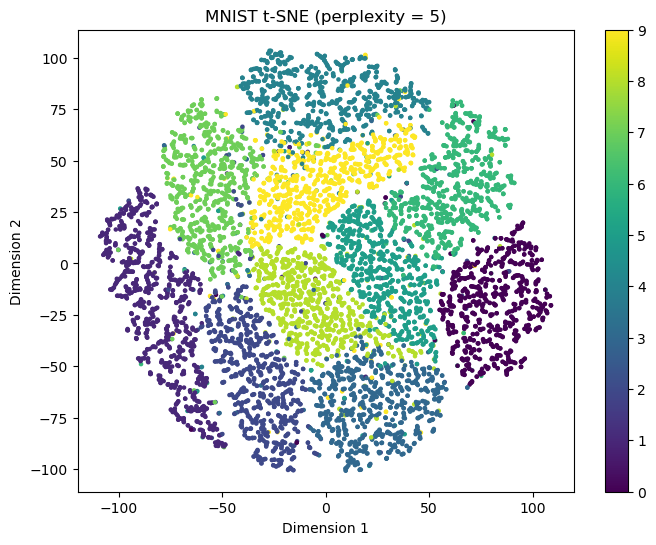

Running t-SNE on MNIST with perplexity = 20


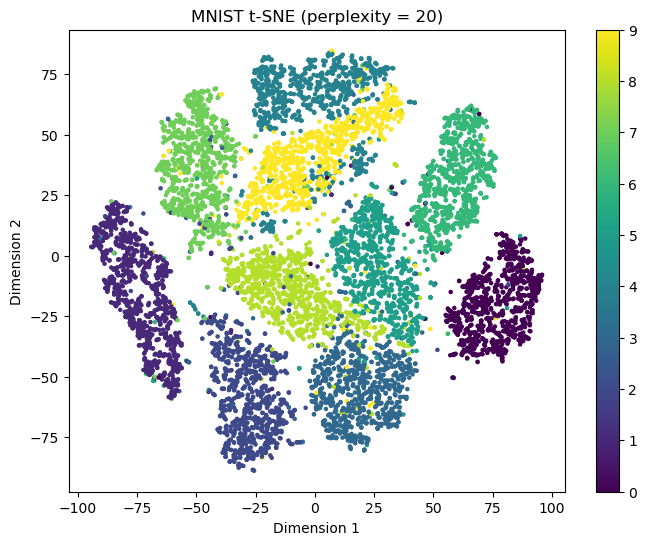

Running t-SNE on MNIST with perplexity = 100


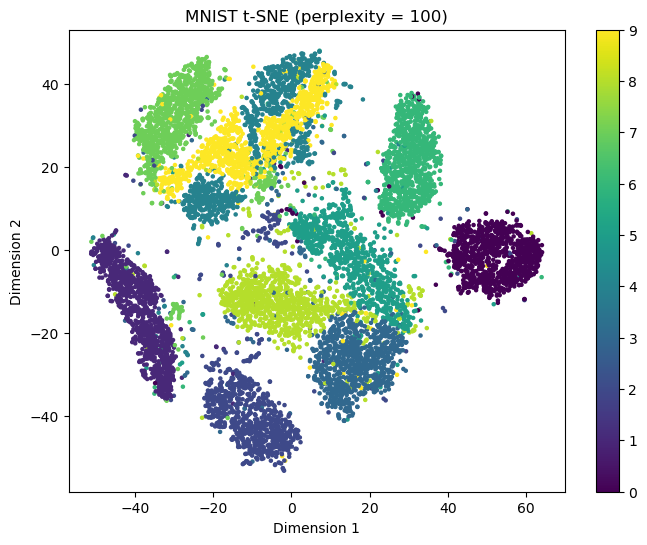

In [71]:


perplexities = [5, 20, 100]

for perp in perplexities:
    print(f"Running t-SNE on MNIST with perplexity = {perp}")
    tsne = TSNE(n_components=2, perplexity=perp, random_state=17)
    X_mnist_tsne = tsne.fit_transform(mnist_X_pca)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1],
                          c=y_mnist_sub, s=5)
    plt.colorbar(scatter, ticks=range(10))
    plt.title(f"MNIST t-SNE (perplexity = {perp})")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


In [50]:
# 20 Newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
y_newsgroups = newsgroups.target

vectorizer = TfidfVectorizer(max_features=10000)
X_newsgroups = vectorizer.fit_transform(texts)
subset = 10000
indices = np.random.choice(X_newsgroups.shape[0], size=subset, replace=False)
X_newsgroups_sub = X_newsgroups[indices].toarray()
y_newsgroups_sub = np.array(y_newsgroups)[indices]
X_newsgroups_pca = PCA(n_components=100).fit_transform(X_newsgroups_sub)


Running t-SNE on 20 Newsgroups with perplexity = 5


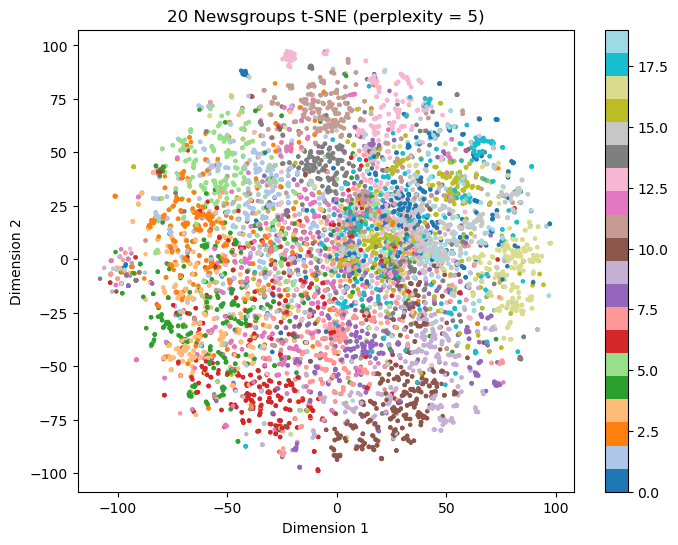

Running t-SNE on 20 Newsgroups with perplexity = 20


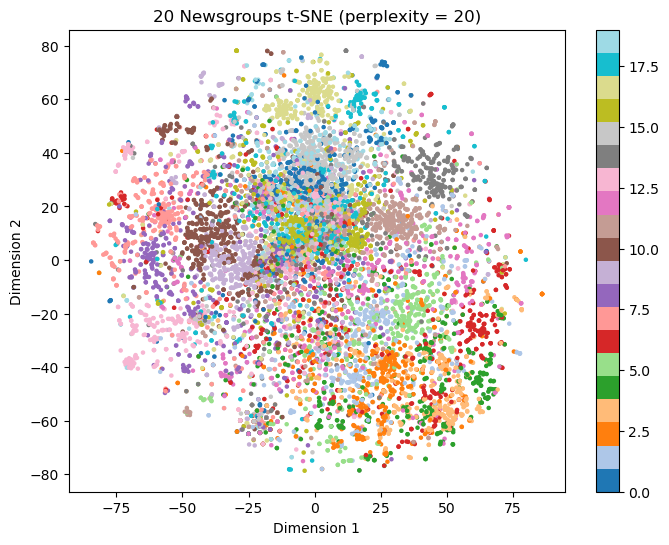

Running t-SNE on 20 Newsgroups with perplexity = 100


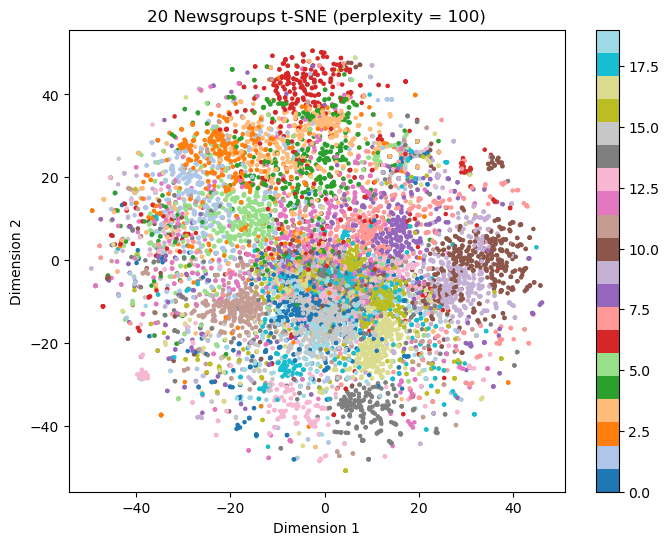

In [72]:

for perp in perplexities:
    print(f"Running t-SNE on 20 Newsgroups with perplexity = {perp}")
    tsne = TSNE(n_components=2, perplexity=perp, random_state=17, metric='cosine')
    X_newsgroups_tsne = tsne.fit_transform(X_newsgroups_sub)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_newsgroups_tsne[:, 0], X_newsgroups_tsne[:, 1],
                          c=y_newsgroups_sub, cmap='tab20', s=5)
    plt.colorbar(scatter)
    plt.title(f"20 Newsgroups t-SNE (perplexity = {perp})")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

### Part B

In [19]:
from sklearn.neighbors import NearestNeighbors

def plot_k_distance(data, minpts):
    nn = NearestNeighbors(n_neighbors=minpts)
    nn.fit(data)
    distances, _ = nn.kneighbors(data)
    distances = np.sort(distances[:, minpts-1])  # Get the k-th nearest neighbor distance
    
    plt.plot(distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{minpts}-th Nearest Neighbor Distance")
    plt.title("k-Distance Graph (Elbow Method for Epsilon)")
    plt.show()

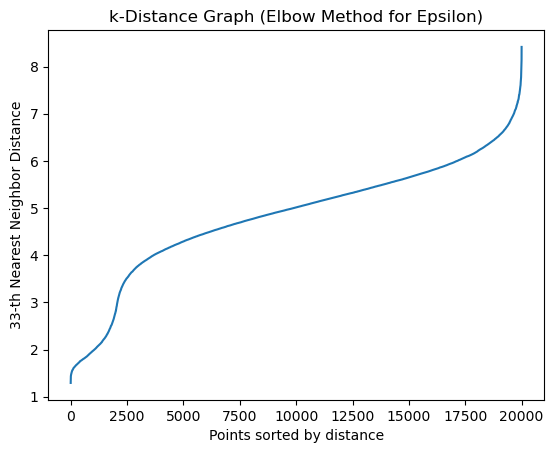

In [61]:
plot_k_distance(mnist_X_pca, 33)

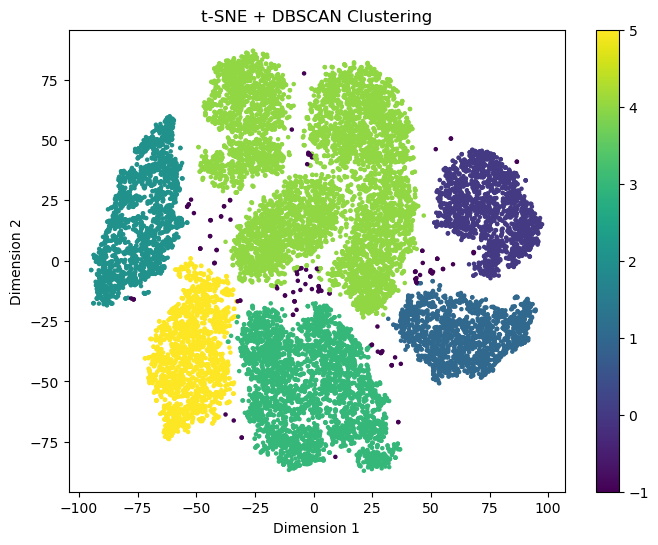

In [69]:


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, s=5)
plt.colorbar(scatter)
plt.title(f"t-SNE + DBSCAN Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [7]:
tsne_dbscan(5, 10, 33, 40)

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

Confusion Matrix for t-SNE (G=3) + DBSCAN:


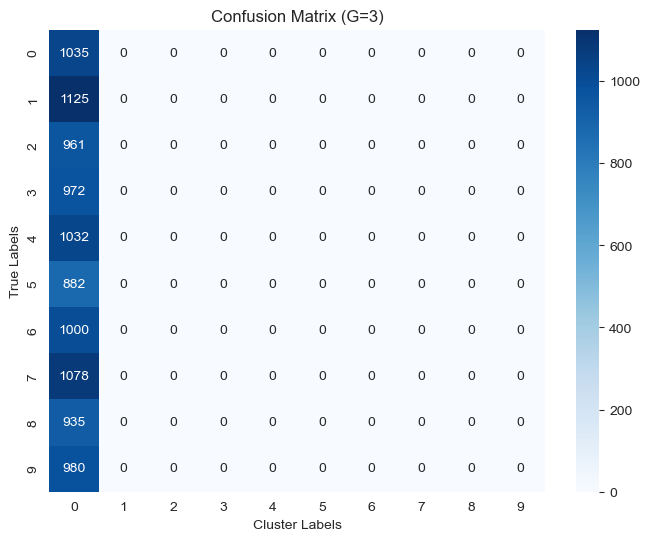

In [6]:
def tsne_dbscan(g, eps, minPts, perp):
    X_tsne = TSNE(n_components=g, perplexity=perp, random_state=17).fit_transform(mnist_X_pca)
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    cluster_labels = dbscan.fit_predict(X_tsne)
    # Compute confusion matrix (excluding noise points labeled as -1)
    valid_indices = cluster_labels != -1
    cm = confusion_matrix(y_mnist_sub[valid_indices], cluster_labels[valid_indices])
    df_cm = pd.DataFrame(cm)
    print(f"Confusion Matrix for t-SNE (G={g}) + DBSCAN:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (G={g})")
    plt.xlabel("Cluster Labels")
    plt.ylabel("True Labels")
    plt.show()
    
tsne_dbscan(3, 9.75, 33, 40)